In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "salary-dataset-simple-linear-regression"       
[2] "student-performance-multiple-linear-regression"

# INTRODUCTION TO LINEAR REGRESSION
## Introduction
This project is on introduction linear regression
## Data 
The data used in this project was sourced from kaggle:https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

Data description:
About Dataset
Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.


The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

## Evaluation

## Features
Variables:
**Hours Studied**: The total number of hours spent studying by each student.

**Previous Scores**: The scores obtained by students in previous tests.

**Extracurricular Activities**: Whether the student participates in extracurricular activities (Yes or No).

**Sleep Hours**: The average number of hours of sleep the student had per day.

**Sample Question Papers Practiced**: The number of sample question papers the student practiced.

Target Variable:

**Performance Index**: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


# Notes
linear model

$$
y = \beta_0 + \beta_1 x + \epsilon
$$

where:
- \( y \) is the dependent variable (the variable we are trying to predict),
- \( x \) is the independent variable (the feature used to predict \( y \)),
- \( \beta_0 \) is the y-intercept (constant),
- \( \beta_1 \) is the slope (coefficient of \( x \)),
- \( \epsilon \) is the error term (the residual).



To estimate the optimal values of Simple Linear Regression in R and Simple Linear Regression in R, you use a method called Ordinary Least Squares (OLS). This method tries to find the parameters that minimize the sum of the squared errors, that is the vertical distance between the predicted y values and the actual y values. The difference is known as the error term.

The very basic assumption about the error terms i is that they are i.i.d. with zero
mean and constant variance.

In [ ]:
## Scatterplot
source of data:https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression

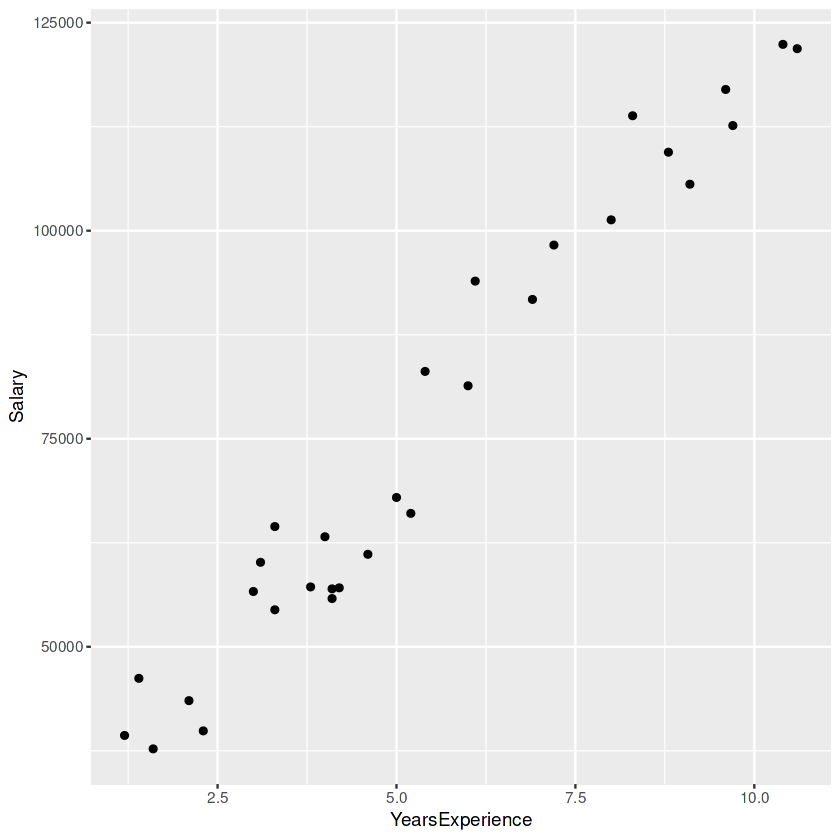

In [9]:
library(ggplot2)
path <- '/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv'
df <-read.csv(path)
ggplot(df,aes(x=YearsExperience, y =  Salary))+
geom_point()

In [10]:
##Linear Regression Model
model <- lm(Salary ~ YearsExperience, data = df)
summary(model)


Call:
lm(formula = Salary ~ YearsExperience, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      24848.2     2306.7   10.77 1.82e-11 ***
YearsExperience   9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16


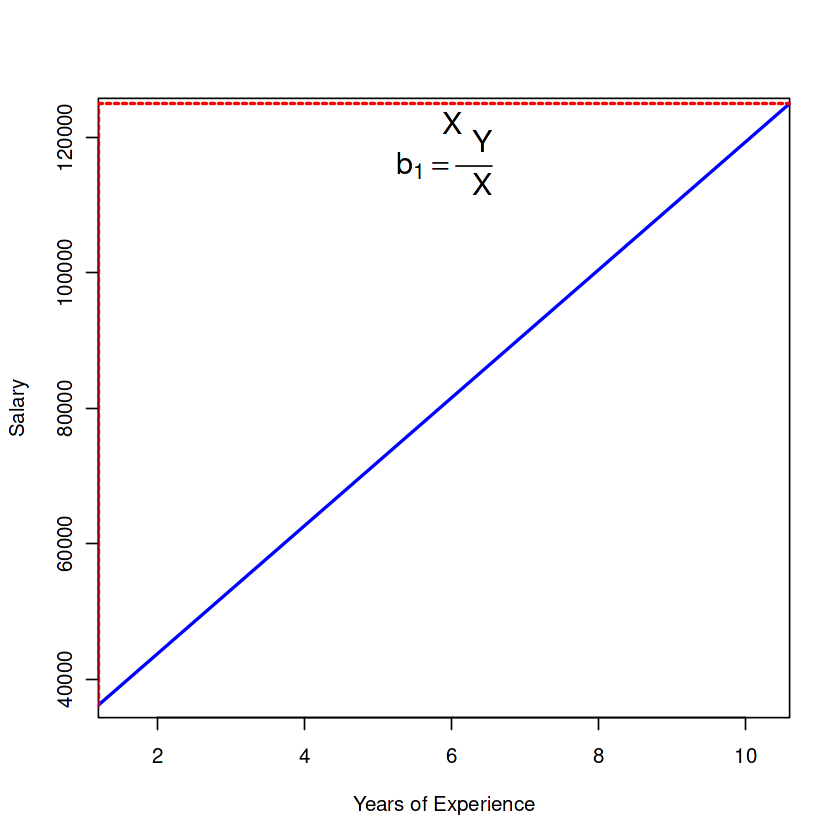

In [11]:
##Visualizing the Fitted Line on Scatter Plot
plot(df$YearsExperience, df$Salary, 
     xlab = "Years of Experience", 
     ylab = "Salary", 
     ylim = c(min(df$Salary), max(df$Salary)), 
     type = "n", 
     xaxs = "i")
abline(a = model$coefficients[1], b = model$coefficients[2], col = "blue", lwd = 2)
text(x = min(df$YearsExperience), y = model$coefficients[1], labels = expression("b"[0]), adj = 0, cex = 1.5)
x <- c(min(df$YearsExperience), max(df$YearsExperience))
y <- predict(model, newdata = data.frame(YearsExperience = x))
segments(x[1], y[2], x[2], y[2], col = "red", lwd = 2, lty = 2)
segments(x[1], y[1], x[1], y[2], col = "red", lwd = 2, lty = 2)
text(x[1], mean(y), labels = expression(Delta~Y), pos = 2, cex = 1.5)
text(mean(x), y[2], labels = expression(Delta~X), pos = 1, cex = 1.5)
text(mean(x), max(df$Salary) * 0.95, labels = expression(b[1] == frac(Delta ~ Y, Delta ~ X)), cex = 1.5)


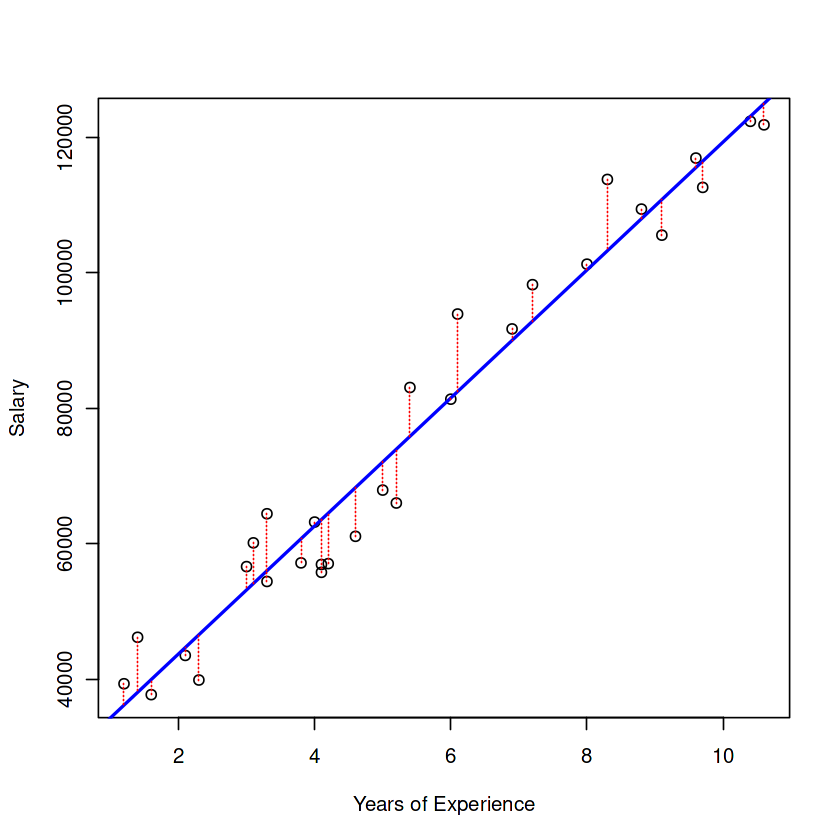

In [12]:
##Fitted Values and Residuals
fitted <- predict(model)
resid <- residuals(model)
df1 <- df %>%
  mutate(Fitted = fitted,
         positive = Salary > Fitted) %>%
  group_by(YearsExperience, positive) %>%
  summarize(Salary_max = max(Salary), 
            Salary_min = min(Salary),
            Fitted = first(Fitted), 
            .groups = 'keep') %>%
  ungroup() %>%
  mutate(Salary = ifelse(positive, Salary_max, Salary_min)) %>%
  arrange(YearsExperience)

plot(df$YearsExperience, df$Salary, xlab = "Years of Experience", ylab = "Salary")
abline(a = model$coefficients[1], b = model$coefficients[2], col = "blue", lwd = 2)


segments(df1$YearsExperience, df1$Salary, df1$YearsExperience, df1$Fitted, col = "red", lty = 3)


# Multiple linear regression
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon
$$

where:
- \( y \) is the dependent variable (the variable we are trying to predict),
- \( x_1, x_2, \dots, x_n \) are the independent variables (features),
- \( \beta_0 \) is the y-intercept (constant term),
- \( \beta_1, \beta_2, \dots, \beta_n \) are the coefficients of the independent variables,
- \( \epsilon \) is the error term (the residual).

In [13]:
#loading dataset
path <- '/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv'
data <- read.csv(path)
head(data)

,Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
,<int>,<int>,<chr>,<int>,<int>,<dbl>
1,7,99,Yes,9,1,91
2,4,82,No,4,2,65
3,8,51,Yes,7,2,45
4,5,52,Yes,5,2,36
5,7,75,No,8,5,66
6,3,78,No,9,6,61


In [14]:
# Displaying the first few rows of the relevant columns
print(head(data[, c('Hours.Studied', 'Previous.Scores', 'Extracurricular.Activities', 
                    'Sleep.Hours', 'Sample.Question.Papers.Practiced', 'Performance.Index')]))


  Hours.Studied Previous.Scores Extracurricular.Activities Sleep.Hours
1             7              99                        Yes           9
2             4              82                         No           4
3             8              51                        Yes           7
4             5              52                        Yes           5
5             7              75                         No           8
6             3              78                         No           9
  Sample.Question.Papers.Practiced Performance.Index
1                                1                91
2                                2                65
3                                2                45
4                                2                36
5                                5                66
6                                6                61


In [15]:
# Building the multiple linear regression model
student_lm <- lm(Performance.Index ~ Hours.Studied + Previous.Scores + Sleep.Hours + 
                 Sample.Question.Papers.Practiced + Extracurricular.Activities, 
                 data = data, na.action = na.omit)

student_lm


Call:
lm(formula = Performance.Index ~ Hours.Studied + Previous.Scores + 
    Sleep.Hours + Sample.Question.Papers.Practiced + Extracurricular.Activities, 
    data = data, na.action = na.omit)

Coefficients:
                     (Intercept)                     Hours.Studied  
                        -34.0756                            2.8530  
                 Previous.Scores                       Sleep.Hours  
                          1.0184                            0.4806  
Sample.Question.Papers.Practiced     Extracurricular.ActivitiesYes  
                          0.1938                            0.6129  


In [16]:
# Assessing the model
summary(student_lm)


Call:
lm(formula = Performance.Index ~ Hours.Studied + Previous.Scores + 
    Sleep.Hours + Sample.Question.Papers.Practiced + Extracurricular.Activities, 
    data = data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6333 -1.3684 -0.0311  1.3556  8.7932 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -34.075588   0.127143 -268.01   <2e-16 ***
Hours.Studied                      2.852982   0.007873  362.35   <2e-16 ***
Previous.Scores                    1.018434   0.001175  866.45   <2e-16 ***
Sleep.Hours                        0.480560   0.012022   39.97   <2e-16 ***
Sample.Question.Papers.Practiced   0.193802   0.007110   27.26   <2e-16 ***
Extracurricular.ActivitiesYes      0.612898   0.040781   15.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 9994 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted 

In [19]:
# Full model with all potential variables for stepwise regression
student_full <- lm(Performance.Index ~ Hours.Studied + Previous.Scores + Sleep.Hours + 
                   Sample.Question.Papers.Practiced + Extracurricular.Activities, 
                   data = data, na.action = na.omit)

summary(student_full)


Call:
lm(formula = Performance.Index ~ Hours.Studied + Previous.Scores + 
    Sleep.Hours + Sample.Question.Papers.Practiced + Extracurricular.Activities, 
    data = data, na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6333 -1.3684 -0.0311  1.3556  8.7932 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      -34.075588   0.127143 -268.01   <2e-16 ***
Hours.Studied                      2.852982   0.007873  362.35   <2e-16 ***
Previous.Scores                    1.018434   0.001175  866.45   <2e-16 ***
Sleep.Hours                        0.480560   0.012022   39.97   <2e-16 ***
Sample.Question.Papers.Practiced   0.193802   0.007110   27.26   <2e-16 ***
Extracurricular.ActivitiesYes      0.612898   0.040781   15.03   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.038 on 9994 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted 

In [20]:
# Stepwise regression to select important features
library(MASS)
step_lm <- stepAIC(student_full, direction = "both")
step_lm


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Start:  AIC=14246.34
Performance.Index ~ Hours.Studied + Previous.Scores + Sleep.Hours + 
    Sample.Question.Papers.Practiced + Extracurricular.Activities

                                   Df Sum of Sq     RSS   AIC
<none>                                            41514 14246
- Extracurricular.Activities        1       938   42452 14468
- Sample.Question.Papers.Practiced  1      3086   44599 14961
- Sleep.Hours                       1      6637   48151 15727
- Hours.Studied                     1    545400  586913 40733
- Previous.Scores                   1   3118438 3159951 57567



Call:
lm(formula = Performance.Index ~ Hours.Studied + Previous.Scores + 
    Sleep.Hours + Sample.Question.Papers.Practiced + Extracurricular.Activities, 
    data = data, na.action = na.omit)

Coefficients:
                     (Intercept)                     Hours.Studied  
                        -34.0756                            2.8530  
                 Previous.Scores                       Sleep.Hours  
                          1.0184                            0.4806  
Sample.Question.Papers.Practiced     Extracurricular.ActivitiesYes  
                          0.1938                            0.6129  


In [21]:
# Display the coefficients from stepwise regression
step_lm$coefficients

(Intercept)                    Hours.Studied 
                     -34.0755881                        2.8529821 
                 Previous.Scores                      Sleep.Hours 
                       1.0184342                        0.4805598 
Sample.Question.Papers.Practiced    Extracurricular.ActivitiesYes 
                       0.1938021                        0.6128976